In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import scipy as sp
import pickle

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Gender%20Classification%20With%20%20Machine%20Learning/names_dataset.csv')

In [6]:
df.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


In [11]:
df.isnull()

,index,name,sex
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95020,False,False,False
95021,False,False,False
95022,False,False,False
95023,False,False,False


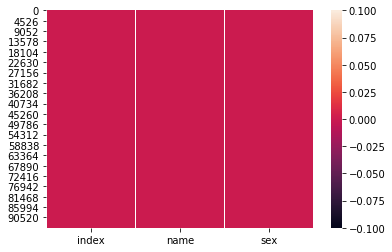

In [15]:
sb.heatmap(df.isna())

In [5]:
df.size

285075

In [6]:
df.columns

Index(['index', 'name', 'sex'], dtype='object')

In [7]:
df.dtypes

index     int64
name     object
sex      object
dtype: object

In [8]:
df.isnull().isnull().sum()

index    0
name     0
sex      0
dtype: int64

In [9]:
df[df.sex == 'F'].size

181800

In [10]:
df[df.sex == 'M'].size

103275

In [11]:
df_names = df

In [12]:

# Replacing All F and M with 0 and 1 respectively
df_names.sex.replace({'F':0,'M':1},inplace=True)

In [13]:
df_names.sex.unique()

array([0, 1], dtype=int64)

In [14]:
df_names.dtypes

index     int64
name     object
sex       int64
dtype: object

In [15]:
Xfeatures =df_names['name']

In [16]:
# Feature Extraction 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [17]:
cv.get_feature_names()

['aaban',
 'aabha',
 'aabid',
 'aabriella',
 'aada',
 'aadam',
 'aadan',
 'aadarsh',
 'aaden',
 'aadesh',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhira',
 'aadhvik',
 'aadhya',
 'aadhyan',
 'aadi',
 'aadian',
 'aadil',
 'aadin',
 'aadish',
 'aadison',
 'aadit',
 'aadith',
 'aadithya',
 'aaditri',
 'aaditya',
 'aadiv',
 'aadon',
 'aadrian',
 'aadrika',
 'aadrit',
 'aadvik',
 'aadvika',
 'aadya',
 'aadyn',
 'aafia',
 'aafreen',
 'aagam',
 'aage',
 'aagot',
 'aahaan',
 'aahan',
 'aahana',
 'aahil',
 'aahir',
 'aahliyah',
 'aahna',
 'aahron',
 'aaidan',
 'aaiden',
 'aaidyn',
 'aaila',
 'aailiyah',
 'aailyah',
 'aaima',
 'aaira',
 'aairah',
 'aaisha',
 'aaishah',
 'aaiyana',
 'aaiza',
 'aaja',
 'aajah',
 'aajaylah',
 'aajon',
 'aakanksha',
 'aakarsh',
 'aakash',
 'aakeem',
 'aakilah',
 'aakira',
 'aakiyah',
 'aakriti',
 'aala',
 'aalaiya',
 'aalaiyah',
 'aalana',
 'aalanah',
 'aalani',
 'aalap',
 'aalaya',
 'aalayah',
 'aalayiah',
 'aalayjah',
 'aalayna',
 'aalaysha',
 'aalaysia',
 'aalea',
 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Features 
X
# Labels
y = df_names.sex

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6398163206734908

In [22]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 63.98163206734908 %


In [23]:

# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 100.0 %



### Sample Prediction

In [24]:
# Sample1 Prediction
sample_name = ["Mary"]
vect = cv.transform(sample_name).toarray()

In [25]:
vect


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:

# Female is 0, Male is 1
clf.predict(vect)

array([0], dtype=int64)

In [27]:
# Sample2 Prediction
sample_name1 = ["Mark"]
vect1 = cv.transform(sample_name1).toarray()

In [28]:
clf.predict(vect1)


array([1], dtype=int64)

In [29]:

# Sample3 Prediction of Russian Names
sample_name2 = ["Natasha"]
vect2 = cv.transform(sample_name2).toarray()

In [30]:
clf.predict(vect2)


array([0], dtype=int64)

In [31]:
# Sample3 Prediction of Random Names
sample_name3 = ["Nefertiti","Nasha","Ama","Ayo","Xhavier","Ovetta","Tathiana","Xia","Joseph","Xianliang"]
vect3 = cv.transform(sample_name3).toarray()

In [32]:
clf.predict(vect3)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
def genderpredictor(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    if clf.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In [34]:
genderpredictor("Martha")


Female


In [35]:

namelist = ["Yaa","Yaw","Femi","Masha"]
for i in namelist:
    print(genderpredictor(i))

Female
None
Male
None
Female
None
Female
None



### Using a custom function for feature analysis

In [36]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

In [37]:
# Vectorize the features function
features = np.vectorize(features)
print(features(["Anna", "Hannah", "Peter","John","Vladmir","Mohammed"]))

[{'first-letter': 'a', 'first2-letters': 'an', 'first3-letters': 'ann', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'nna'}
 {'first-letter': 'h', 'first2-letters': 'ha', 'first3-letters': 'han', 'last-letter': 'h', 'last2-letters': 'ah', 'last3-letters': 'nah'}
 {'first-letter': 'p', 'first2-letters': 'pe', 'first3-letters': 'pet', 'last-letter': 'r', 'last2-letters': 'er', 'last3-letters': 'ter'}
 {'first-letter': 'j', 'first2-letters': 'jo', 'first3-letters': 'joh', 'last-letter': 'n', 'last2-letters': 'hn', 'last3-letters': 'ohn'}
 {'first-letter': 'v', 'first2-letters': 'vl', 'first3-letters': 'vla', 'last-letter': 'r', 'last2-letters': 'ir', 'last3-letters': 'mir'}
 {'first-letter': 'm', 'first2-letters': 'mo', 'first3-letters': 'moh', 'last-letter': 'd', 'last2-letters': 'ed', 'last3-letters': 'med'}]


In [38]:
# Extract the features for the dataset
df_X = features(df_names['name'])

In [39]:

df_y = df_names['sex']

In [40]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["Mike", "Julia"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
print(transformed)

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 11)	1.0


In [41]:
dv.get_feature_names()

['first-letter=j',
 'first-letter=m',
 'first2-letters=ju',
 'first2-letters=mi',
 'first3-letters=jul',
 'first3-letters=mik',
 'last-letter=a',
 'last-letter=e',
 'last2-letters=ia',
 'last2-letters=ke',
 'last3-letters=ike',
 'last3-letters=lia']

In [42]:
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

In [43]:
dfX_train


array([{'first-letter': 'e', 'first2-letters': 'el', 'first3-letters': 'ele', 'last-letter': 'a', 'last2-letters': 'ia', 'last3-letters': 'nia'},
       {'first-letter': 'a', 'first2-letters': 'ad', 'first3-letters': 'adi', 'last-letter': 'l', 'last2-letters': 'il', 'last3-letters': 'dil'},
       {'first-letter': 'k', 'first2-letters': 'ka', 'first3-letters': 'kad', 'last-letter': 'e', 'last2-letters': 'ze', 'last3-letters': 'nze'},
       ...,
       {'first-letter': 'j', 'first2-letters': 'ja', 'first3-letters': 'jaz', 'last-letter': 'y', 'last2-letters': 'ly', 'last3-letters': 'zly'},
       {'first-letter': 'e', 'first2-letters': 'el', 'first3-letters': 'elv', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'ina'},
       {'first-letter': 'l', 'first2-letters': 'le', 'first3-letters': 'led', 'last-letter': 'r', 'last2-letters': 'er', 'last3-letters': 'ger'}],
      dtype=object)

In [44]:
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<63666x8194 sparse matrix of type '<class 'numpy.float64'>'
	with 381996 stored elements in Compressed Sparse Row format>

In [45]:
# Model building Using DecisionTree

from sklearn.tree import DecisionTreeClassifier
 
dclf = DecisionTreeClassifier()
my_xfeatures =dv.transform(dfX_train)
dclf.fit(my_xfeatures, dfy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
# Build Features and Transform them
sample_name_eg = ["Alex"]
transform_dv =dv.transform(features(sample_name_eg))

In [47]:
vect3 = transform_dv.toarray()

In [48]:
# Male is 1,female = 0
dclf.predict(vect3)

array([1], dtype=int64)

In [49]:
if dclf.predict(vect3) == 0:
    print("Female")
else:
    print("Male")

Male


In [50]:
# Second Prediction With Nigerian Name
name_eg1 = ["Chioma"]
transform_dv =dv.transform(features(name_eg1))
vect4 = transform_dv.toarray()
if dclf.predict(vect4) == 0:
    print("Female")
else:
    print("Male")

Female


In [51]:
# A function to do it
def genderpredictor1(a):
    test_name1 = [a]
    transform_dv =dv.transform(features(test_name1))
    vector = transform_dv.toarray()
    if dclf.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In [52]:
random_name_list = ["Alex","Alice","Chioma","Vitalic","Clairese","Chan"]

In [53]:

for n in random_name_list:
    print(genderpredictor1(n))

Male
None
Female
None
Female
None
Female
None
Female
None
Male
None


In [54]:

## Accuracy of Models Decision Tree Classifier Works better than Naive Bayes
# Accuracy on training set
print(dclf.score(dv.transform(dfX_train), dfy_train))

0.9888951716771903


In [55]:

# Accuracy on test set
print(dclf.score(dv.transform(dfX_test), dfy_test))

0.8662903791574986



### Saving Our Model

In [8]:
from sklearn.externals import joblib

C:\Users\DELL\anaconda3\desktop\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [57]:
decisiontreModel = open("decisiontreemodel.pkl","wb")


In [58]:
joblib.dump(dclf,decisiontreModel)


In [59]:
decisiontreModel.close


<function BufferedWriter.close>

In [60]:
#Alternative to Model Saving
import pickle
dctreeModel = open("namesdetectormodel.pkl","wb")

In [61]:
pickle.dump(dclf,dctreeModel)


In [62]:
dctreeModel.close()
